Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

# Initialise & Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

DATADIR = "D:\OneDrive\Documents\Studies Information\PIAIC\Batch 34_2\Python Code\Deep Learning\Assignments\\flowers"
CATEGORIES = ["daisy", "dandelion", "rose", "sunflower", "tulip"]
IMG_SIZE = 180 #256 #150


# Load Data

In [2]:
full_ds = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #making path to folder
        label_img = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                raw_img = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #get full image path & make it GRAY
                #raw_img = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR) #get full image path & make it COLOR
                resized_img = cv2.resize(raw_img, (IMG_SIZE, IMG_SIZE))
                full_ds.append([resized_img, label_img])
            except Exception as e:
                print("Corupted Images: ",os.path.join(DATADIR,category,img))
                
            
        
create_training_data()     


Corupted Images:  D:\OneDrive\Documents\Studies Information\PIAIC\Batch 34_2\Python Code\Deep Learning\Assignments\flowers\dandelion\flickr.py
Corupted Images:  D:\OneDrive\Documents\Studies Information\PIAIC\Batch 34_2\Python Code\Deep Learning\Assignments\flowers\dandelion\flickr.pyc
Corupted Images:  D:\OneDrive\Documents\Studies Information\PIAIC\Batch 34_2\Python Code\Deep Learning\Assignments\flowers\dandelion\run_me.py


# Preprocessing Data

In [3]:
np.random.shuffle(full_ds) #Shuffle data

In [46]:
#Data preprocessing for feeding into the model¶
x = []
y = []

for features, labels in full_ds:
    x.append(features)
    y.append(labels)
    
x = np.array(x).reshape(-1, IMG_SIZE*IMG_SIZE)      # 1 is for Grey image

In [47]:
#Split Data (60 train + 40 test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)

#Split Data (80 train + 20 Val)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42) 

In [48]:
print('Train Data:')
print('Data: {} -- Label: {}'.format(len(x_train),len(y_train)))
print('Sample Data: {} -- Sample Label: {}'.format(x_train[0], y_train[0]))

print(' ')
print('Val Data:')
print('Data: {} -- Label: {}'.format(len(x_val),len(y_val)))
print('Val Data: {} -- Val Label: {}'.format(x_val[0], y_val[0]))

print(' ')
print('Test Data:')
print('Data: {} -- Label: {}'.format(len(x_test),len(y_test)))
print('Sample Data: {} -- Sample Label: {}'.format(x_test[0], y_test[0]))

Train Data:
Data: 2074 -- Label: 2074
Sample Data: [207 203 198 ...  54  53  52] -- Sample Label: 2
 
Val Data:
Data: 519 -- Label: 519
Val Data: [36 37 36 ... 85 85 83] -- Val Label: 1
 
Test Data:
Data: 1730 -- Label: 1730
Sample Data: [95 94 91 ... 75 79 83] -- Sample Label: 3


In [49]:
# One-Hot Encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)


In [50]:
print('Train Data:')
print('Data: {} -- Label: {}'.format(len(x_train),len(y_train)))
print('Sample Data: {} -- Sample Label: {}'.format(x_train[0], y_train[0]))

Train Data:
Data: 2074 -- Label: 2074
Sample Data: [207 203 198 ...  54  53  52] -- Sample Label: [0. 0. 1. 0. 0.]


In [51]:
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_val = scaler.fit_transform(x_val)
#x_test = scaler.fit_transform(x_test)

x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0


print('Train Data:')
print('Data: {} -- Label: {}'.format(len(x_train),len(y_train)))
print('Sample Data: {} -- Sample Label: {}'.format(x_train[0], y_train[0]))

Train Data:
Data: 2074 -- Label: 2074
Sample Data: [0.81176471 0.79607843 0.77647059 ... 0.21176471 0.20784314 0.20392157] -- Sample Label: [0. 0. 1. 0. 0.]


# Create Model

In [171]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

Network = models.Sequential()
Network.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001), input_shape=(x_train.shape[1], ))) # for Grey
Network.add(layers.Dense(32, activation='relu')) 
Network.add(layers.Dense(5, activation='softmax'))

# Compilation
Network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [172]:
Network.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 32)                1036832   
_________________________________________________________________
dense_85 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_86 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_87 (Dense)             (None, 5)                 165       
Total params: 1,039,109
Trainable params: 1,039,109
Non-trainable params: 0
_________________________________________________________________


In [173]:
from tensorflow.keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 25, 
                                        restore_best_weights = True, verbose = 1)

In [174]:
#Train Model
#history = Network.fit(train_data, train_label, epochs=100, batch_size=50, validation_data=(val_data, val_label), callbacks =[earlystopping])
history = Network.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val), callbacks =[earlystopping])

Train on 2074 samples, validate on 519 samples
Epoch 1/100
2074/2074 [==============================] - 3s 2ms/sample - loss: 6.2869 - accuracy: 0.2223 - val_loss: 3.7955 - val_accuracy: 0.2755
Epoch 2/100
2074/2074 [==============================] - 2s 793us/sample - loss: 3.1976 - accuracy: 0.2676 - val_loss: 2.6376 - val_accuracy: 0.2890
Epoch 3/100
2074/2074 [==============================] - 2s 770us/sample - loss: 2.5198 - accuracy: 0.2633 - val_loss: 2.7914 - val_accuracy: 0.2929
Epoch 4/100
2074/2074 [==============================] - 2s 767us/sample - loss: 2.8952 - accuracy: 0.2464 - val_loss: 3.3459 - val_accuracy: 0.2524
Epoch 5/100
2074/2074 [==============================] - 2s 793us/sample - loss: 2.7088 - accuracy: 0.2271 - val_loss: 2.4449 - val_accuracy: 0.2042
Epoch 6/100
2074/2074 [==============================] - 2s 770us/sample - loss: 2.0612 - accuracy: 0.2546 - val_loss: 2.0687 - val_accuracy: 0.2929
Epoch 7/100
2074/2074 [==============================] - 2s 7

2074/2074 [==============================] - 2s 878us/sample - loss: 1.9084 - accuracy: 0.2878 - val_loss: 1.8601 - val_accuracy: 0.2736
Epoch 56/100
2074/2074 [==============================] - 2s 788us/sample - loss: 1.8625 - accuracy: 0.3018 - val_loss: 1.8427 - val_accuracy: 0.2852
Epoch 57/100
2074/2074 [==============================] - 2s 1ms/sample - loss: 1.9869 - accuracy: 0.2710 - val_loss: 1.8728 - val_accuracy: 0.2794
Epoch 58/100
2074/2074 [==============================] - 2s 751us/sample - loss: 1.8695 - accuracy: 0.2912 - val_loss: 1.8143 - val_accuracy: 0.3044
Epoch 59/100
2074/2074 [==============================] - 2s 761us/sample - loss: 1.8593 - accuracy: 0.3018 - val_loss: 1.9547 - val_accuracy: 0.2197
Epoch 60/100
2074/2074 [==============================] - 2s 809us/sample - loss: 1.9326 - accuracy: 0.2768 - val_loss: 1.9894 - val_accuracy: 0.2717
Epoch 61/100
2074/2074 [==============================] - 2s 878us/sample - loss: 1.9036 - accuracy: 0.2883 - val_l

# Plotting the training and validation loss

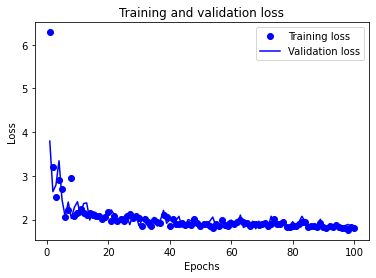

In [175]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plotting the training and validation accuracy


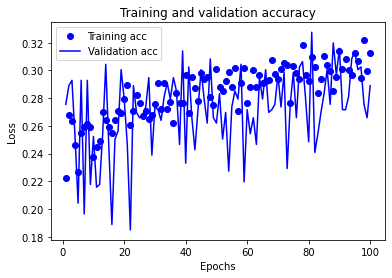

In [176]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate Model

In [177]:
#Check Model performance of Train Data
train_loss,train_acc=Network.evaluate(x_train, y_train)
print("Accuracy: ",train_acc*100,"\nTrain Loss Value:",train_loss)
#test_labels[15]

2074/2074 [==============================] - 1s 394us/sample - loss: 1.8192 - accuracy: 0.3100
Accuracy:  31.002894043922424 
Train Loss Value: 1.8192249676760506


In [178]:
#Check Model performance of Test Data
test_loss,test_acc=Network.evaluate(x_test, y_test)
print("Accuracy: ",test_acc*100,"\nTest Loss Value:",test_loss)

1730/1730 [==============================] - 1s 339us/sample - loss: 1.8671 - accuracy: 0.2827
Accuracy:  28.265896439552307 
Test Loss Value: 1.8671064762710836


# Prediction

In [179]:
predictions = Network.predict_classes(x_test)
# show the inputs and predicted outputs
for i in range(10):
    print("Predicted Value: {} -- Original Value: {}"
          .format(CATEGORIES[predictions[i]], CATEGORIES[np.argmax(y_test[i])]))

Predicted Value: tulip -- Original Value: sunflower
Predicted Value: dandelion -- Original Value: daisy
Predicted Value: dandelion -- Original Value: rose
Predicted Value: dandelion -- Original Value: daisy
Predicted Value: dandelion -- Original Value: tulip
Predicted Value: tulip -- Original Value: tulip
Predicted Value: dandelion -- Original Value: tulip
Predicted Value: dandelion -- Original Value: daisy
Predicted Value: tulip -- Original Value: tulip
Predicted Value: dandelion -- Original Value: daisy
